In [1]:
from statsmodels.compat import lmap
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [2]:
norms = sm.robust.norms

In [3]:
def plot_weights(support, weights_func, xlabels, xticks):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.plot(support, weights_func(support))
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels, fontsize=16)
    ax.set_ylim(-.1, 1.1)
    plt.show()
    return ax

In [4]:
help(norms.AndrewWave.weights)

Help on function weights in module statsmodels.robust.norms:

weights(self, z)
    Andrew's wave weighting function for the IRLS algorithm
    
    The psi function scaled by z
    
    Parameters
    ----------
    z : array-like
        1d array
    
    Returns
    -------
    weights : array
        weights(z) = sin(z/a)/(z/a)     for \|z\| <= a*pi
    
        weights(z) = 0                  for \|z\| > a*pi



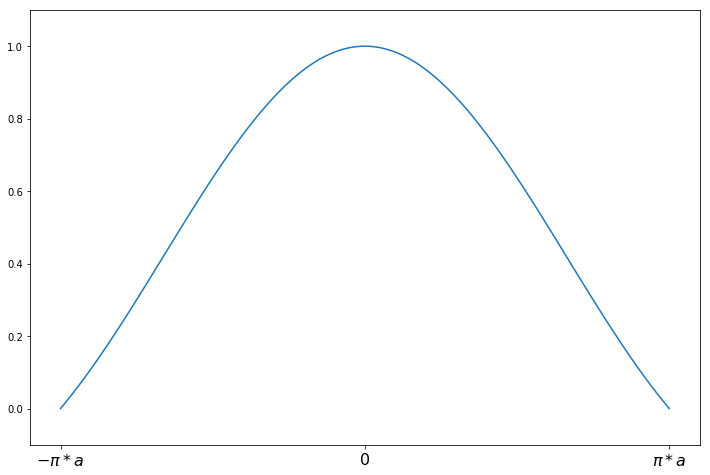

In [5]:
a = 1.339
support = np.linspace(-np.pi*a, np.pi*a, 100)
andrew = norms.AndrewWave(a=a)
plot_weights(support, andrew.weights, ['$-\pi*a$', '0', '$\pi*a$'], [-np.pi*a, 0, np.pi*a]);

In [6]:
help(norms.Hampel.weights)

Help on function weights in module statsmodels.robust.norms:

weights(self, z)
    Hampel weighting function for the IRLS algorithm
    
    The psi function scaled by z
    
    Parameters
    ----------
    z : array-like
        1d array
    
    Returns
    -------
    weights : array
        weights(z) = 1                            for \|z\| <= a
    
        weights(z) = a/\|z\|                        for a < \|z\| <= b
    
        weights(z) = a*(c - \|z\|)/(\|z\|*(c-b))      for b < \|z\| <= c
    
        weights(z) = 0                            for \|z\| > c



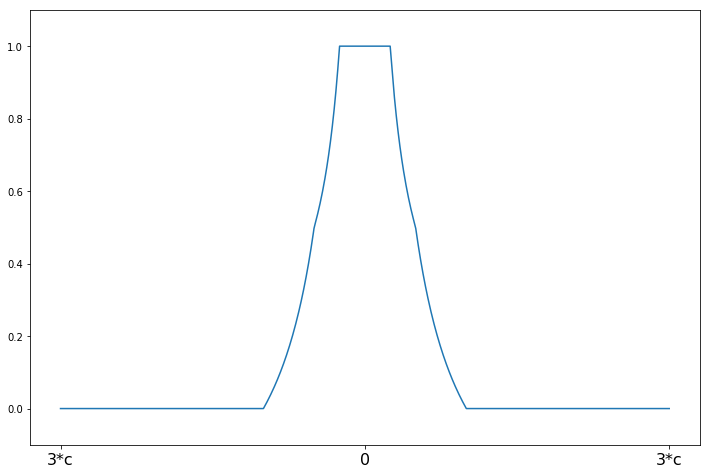

In [7]:
c = 8
support = np.linspace(-3*c, 3*c, 1000)
hampel = norms.Hampel(a=2., b=4., c=c)
plot_weights(support, hampel.weights, ['3*c', '0', '3*c'], [-3*c, 0, 3*c]);

In [8]:
help(norms.HuberT.weights)

Help on function weights in module statsmodels.robust.norms:

weights(self, z)
    Huber's t weighting function for the IRLS algorithm
    
    The psi function scaled by z
    
    Parameters
    ----------
    z : array-like
        1d array
    
    Returns
    -------
    weights : array
        weights(z) = 1          for \|z\| <= t
    
        weights(z) = t/\|z\|      for \|z\| > t



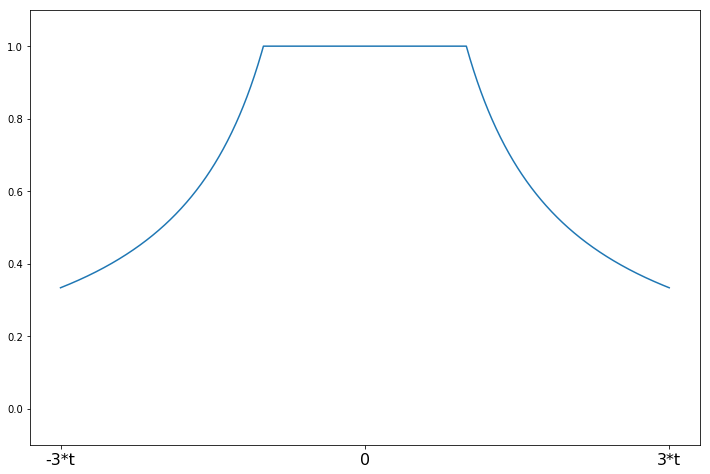

In [9]:
t = 1.345
support = np.linspace(-3*t, 3*t, 1000)
huber = norms.HuberT(t=t)
plot_weights(support, huber.weights, ['-3*t', '0', '3*t'], [-3*t, 0, 3*t]);

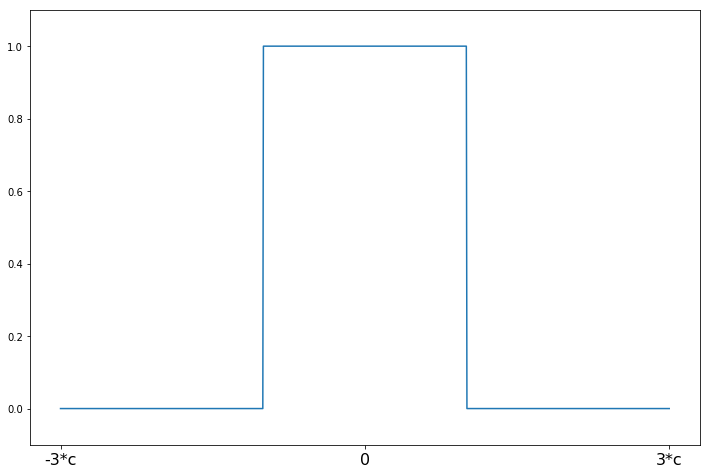

In [10]:
c = 2
support = np.linspace(-3*c, 3*c, 1000)
trimmed = norms.TrimmedMean(c=c)
plot_weights(support, trimmed.weights, ['-3*c', '0', '3*c'], [-3*c, 0, 3*c]);

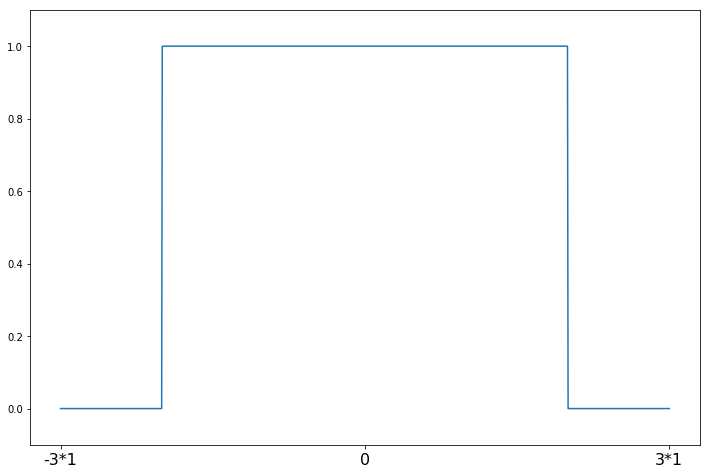

In [11]:
c=1
support = np.linspace(-3*c, 3*c, 1000)
trimmed = norms.TrimmedMean(2)
plot_weights(support, trimmed.weights, ['-3*'+str(c), '0', '3*'+str(c)], [-3*c, 0, 3*c]);

In [12]:
from statsmodels.graphics.api import abline_plot
from statsmodels.formula.api import ols, rlm


In [13]:
#Para usar esta función debe tener acceso a internet para la descarga de datos.
dta = sm.datasets.get_rdataset("starsCYG", "robustbase", cache=True).data


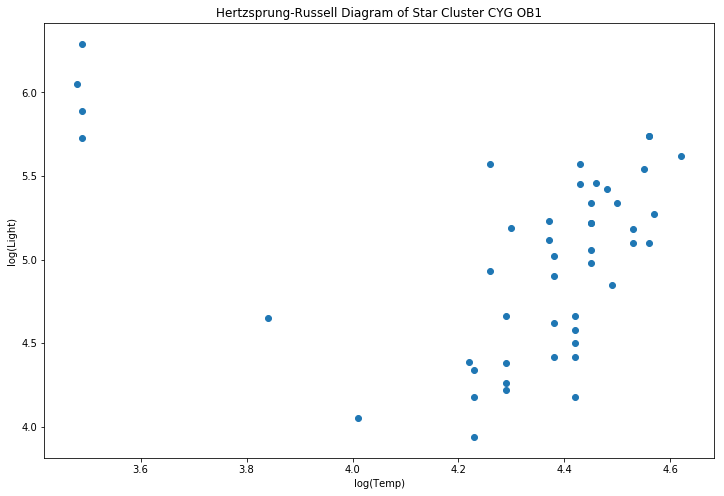

In [14]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, xlabel='log(Temp)', ylabel='log(Light)', title='Hertzsprung-Russell Diagram of Star Cluster CYG OB1')
ax.scatter(*dta.values.T)

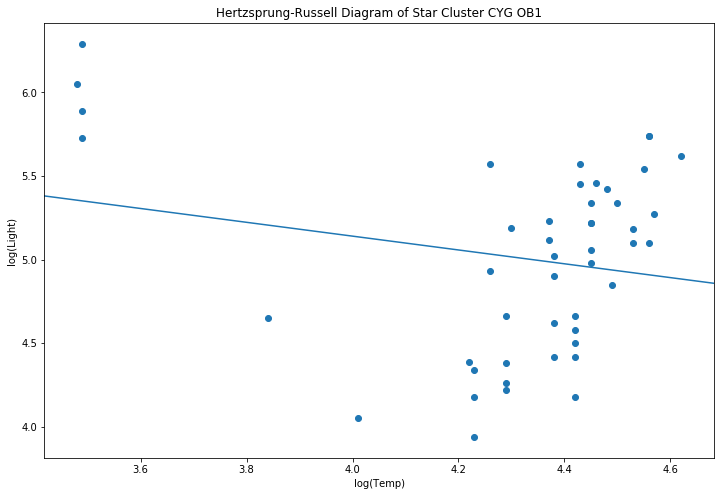

In [15]:
y = dta['log.light']
X = sm.add_constant(dta['log.Te'], prepend=True)
ols_model = sm.OLS(y, X).fit()
abline_plot(model_results=ols_model, ax=ax)

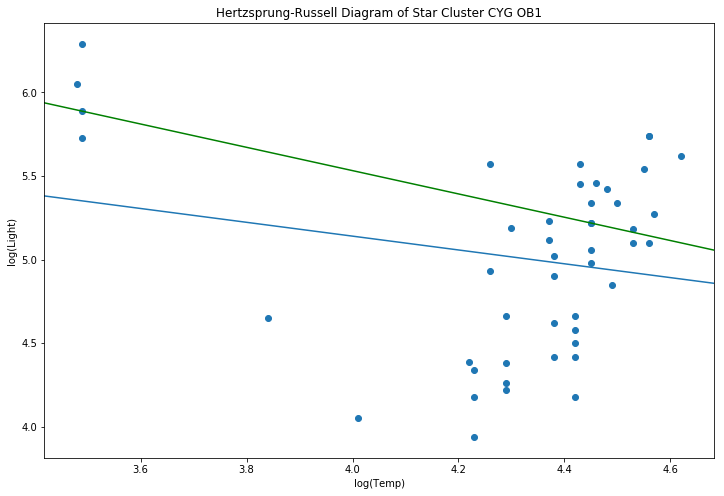

In [16]:
rlm_mod = sm.RLM(y, X, sm.robust.norms.AndrewWave(.5)).fit()
abline_plot(model_results=rlm_mod, ax=ax, color='green')

In [19]:
rlm_mod = sm.RLM(y, X, sm.robust.norms.TrimmedMean(.5)).fit()
abline_plot(model_results=rlm_mod, ax=ax, color='k')
plt.show()